In [1]:
library(lars)
data(diabetes)

par(mfrow=c(1,2))
attach(diabetes)
object.step <- lars(x,y,type="stepwise")
object.lasso <- lars(x,y,type="lasso")

library(ridge)
lambda <-seq(from=1,to=0,length=100)
lambda <- seq(from=100,to=0,length=10000)
object.ridge <- linearRidge(y ~ x,lambda=lambda)

detach(diabetes)

Loaded lars 1.2



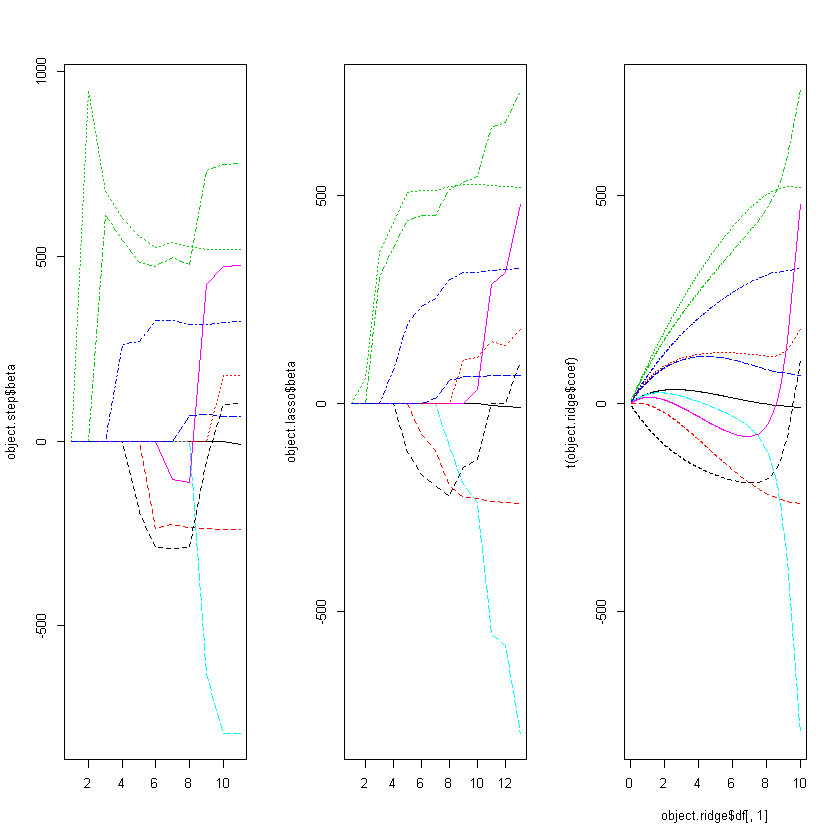

In [2]:
par(mfcol=c(1,3))
matplot(object.step$beta,type="l")
matplot(object.lasso$beta,type="l")
matplot(object.ridge$df[,1],t(object.ridge$coef),type="l")
par(mfcol=c(1,1))

1.Stepwise Way

影響の大きな結果を一番説明しうる変数から、順番に変数を選択し、変数のサブセットを作成する方法
 ∥y-y^∥^2が最小になるように一つずつサブセットの変数を増加させる。
 
 
2.LASSO
 β^= adgmin_β(∥y-Xβ∥^2+λ∥β∥)
  
 ∥y-y^∥^2が最小になるようにし、λ∥β∥を用いた正則化を行う。
 λはComplexity Parameterと呼ばれ、λによりモデルの複雑性が調整される。
 stepwiseと比較してみると一つのパラメータしか選択していないときのβ値が、おさえられている。


3.Ridge Regression
β^= adgmin_β(∥y-Xβ∥^2+λ∥β∥^2)

∥y-y^∥^2が最小になるようにし、λ∥β∥^2を用いた正則化を行う。
変数の選択を行わない方法であり、それぞれのパラメータに大きな値を与えない制約を加えることで複雑性を制御している。